# **Predicting Falcon 9 First Stage Landings to Optimize Launch Costs: Exploratory Data Analysis**


In this project, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. 


## Objectives


* Perform Exploratory Data Analysis and determine Training Labels
* Determine relationships between different features to prepare for Data Feature Engineering


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('dataset_part_1.csv')
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [3]:
df.isnull().sum() / len(df) * 100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [4]:
# Identify which columns are categorical and which are numerical
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### Calculate the number of launches on each site

In [5]:
df['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types:




* <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit'>[1]</a>.

* <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges'>[2]</a>.


* <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html" >[3] </a>.


* <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit">[4] <a>.
    
    
    
* <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point#L1_point">[5]</a> .
    
    
* <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit">[6]</a>.


* <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station"> [7] </a>


* <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [8] </a>


* <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [9] </a>


* <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit"> [10] </a>


* <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit"> [11] </a>


### Calculate the number and occurrence of each orbit


In [6]:
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

### Calculate the number and occurence of mission outcome of the orbits


In [7]:
df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

<code>True Ocean</code>: mission outcome was successfully landed to a specific region of the ocean.

<code>False Ocean</code>: mission outcome was unsuccessfully landed to a specific region of the ocean. 

<code>True RTLS</code>: mission outcome was successfully landed to a ground pad.

<code>False RTLS</code>: mission outcome was unsuccessfully landed to a ground pad.

<code>True ASDS</code>: mission outcome was successfully landed to a drone ship. 

<code>False ASDS</code>: mission outcome was unsuccessfully landed to a drone ship. 

<code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [8]:
# Create a set of outcomes that didn't land
bad_outcomes = [outcome for outcome in df['Outcome'].unique() \
                if 'None' in outcome or 'False' in outcome]
bad_outcomes

['None None', 'False Ocean', 'False ASDS', 'None ASDS', 'False RTLS']

In [9]:
# Create landing label (classification variable) for bad outcomes
df['Class'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

In [10]:
df['Class'].value_counts()

Class
1    60
0    30
Name: count, dtype: int64

In [11]:
# Determine success rate of landings
print(f"% of successful landings: {df['Class'].mean() * 100:.2f}%")

% of successful landings: 66.67%


In [12]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [13]:
# PayloadMass vs Orbit, Payload vs LaunchSite, 
# FlightNumber vs LaunchSite, FlightNumber vs PayloadMass

In [14]:
def plot_function(x, y, aspect=2, title=None, xlabel=None, ylabel=None):

    g= sns.catplot(y=y, x=x, hue='Class', data=df, aspect=2)
    
    # Access the legend and update it
    new_labels = ['Successful', 'Unsuccessful']
    g._legend.set_title('Landing Class')
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)

    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.title(title if title else f'{y} vs {x}')
    plt.show()


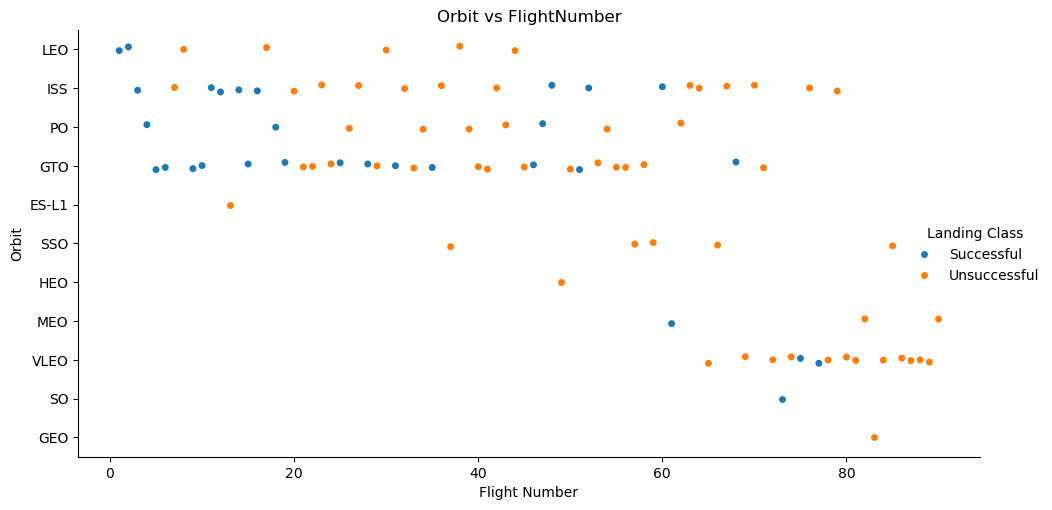

In [15]:
plot_function('FlightNumber', 'Orbit', ylabel='Orbit', xlabel='Flight Number')

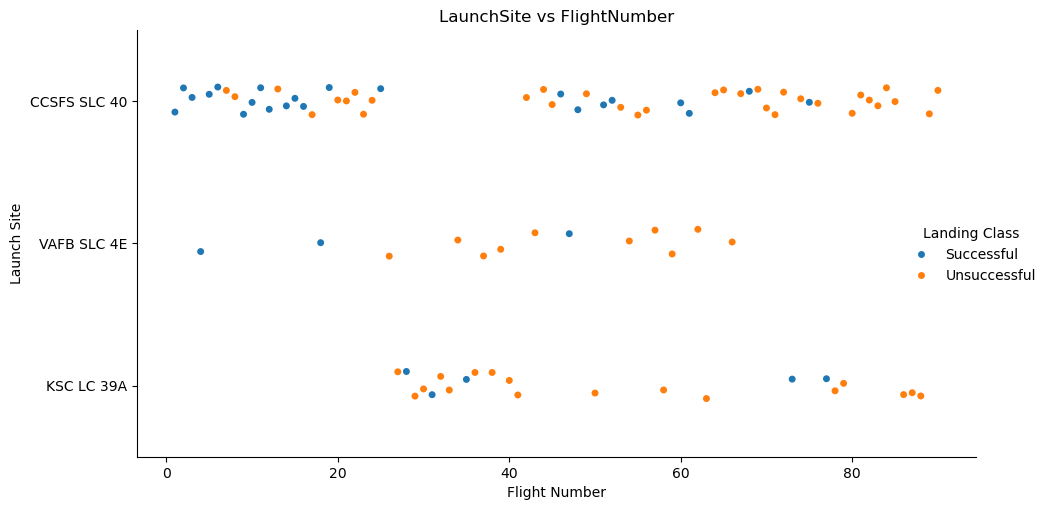

In [16]:
plot_function('FlightNumber', 'LaunchSite', ylabel='Launch Site', xlabel='Flight Number')

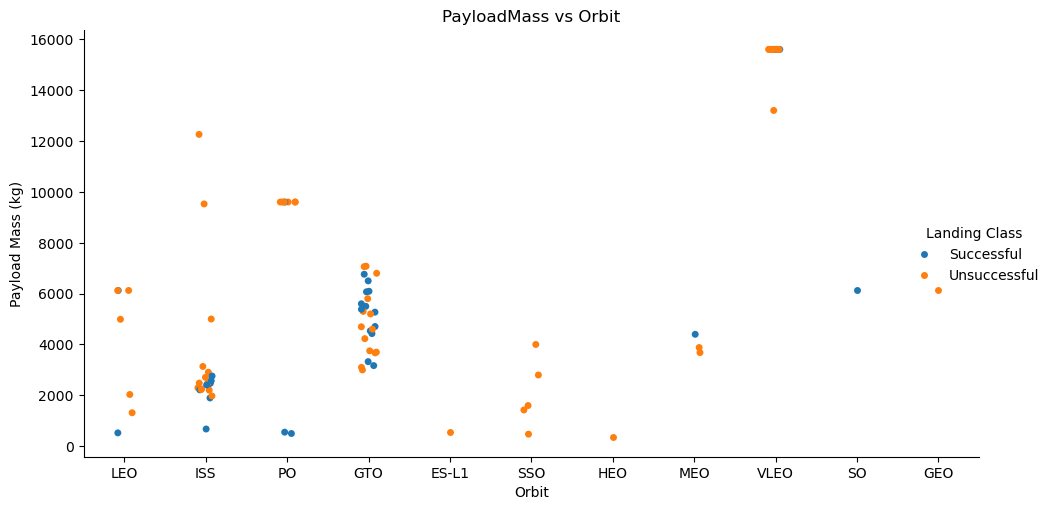

In [17]:
plot_function('Orbit', 'PayloadMass', ylabel='Payload Mass (kg)', xlabel='Orbit')

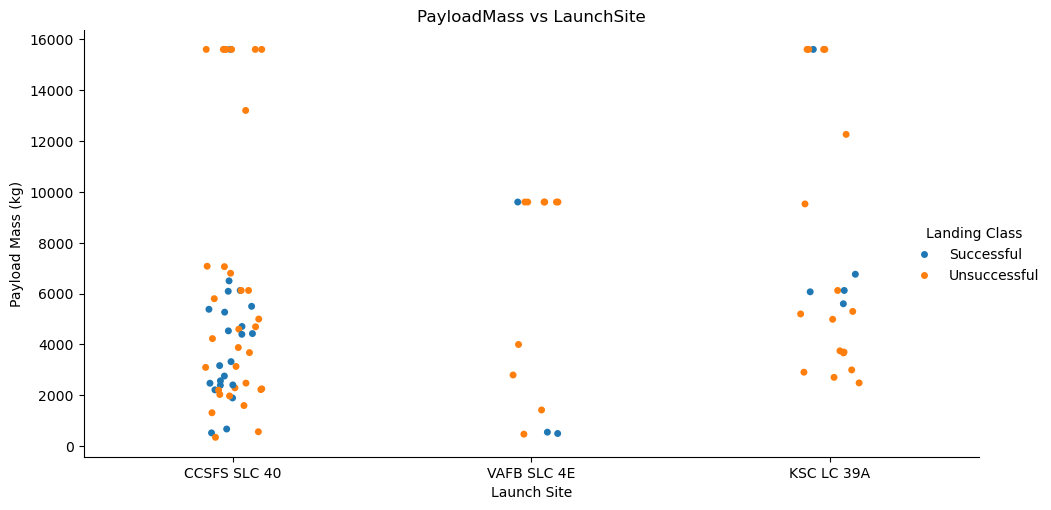

In [18]:
plot_function(x='LaunchSite', y='PayloadMass', ylabel='Payload Mass (kg)', xlabel='Launch Site')

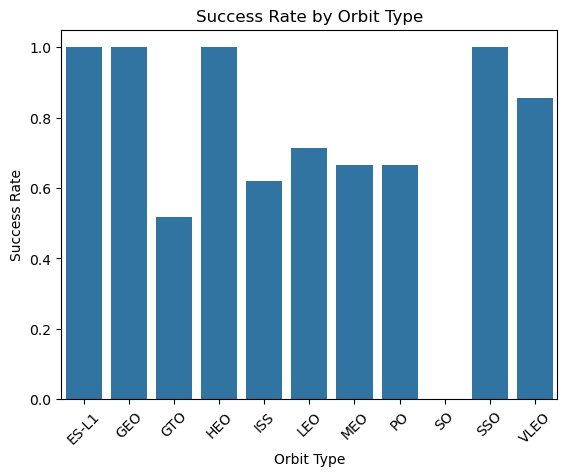

In [19]:
# Success Rate of each Orbit Type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate.columns = ['Orbit', 'Success Rate']
sns.barplot(x='Orbit', y='Success Rate', data=orbit_success_rate)
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Extract year from the Date column
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])

In [21]:
avg_success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()
avg_success_rate_by_year.columns = ['Year', 'Success Rate']
avg_success_rate_by_year

,Year,Success Rate
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


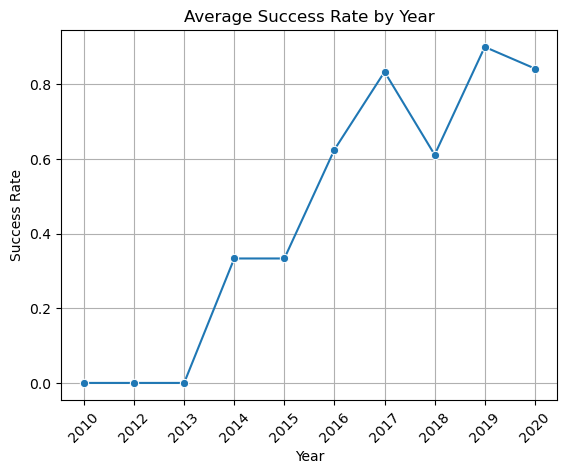

In [22]:
sns.lineplot(x='Year', y='Success Rate', data=avg_success_rate_by_year, marker='o')
plt.title('Average Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [23]:
df.to_csv('dataset_part_2.csv', index=False)